In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

df=pd.read_csv('archive (10).zip')

In [79]:
df.isnull().sum()

Order ID             0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
date                 0
month                0
dtype: int64

In [13]:
df.dtypes


Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [15]:
df['date']=pd.to_datetime(df['Date'],format="%d-%m-%y")

In [17]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status', 'date'],
      dtype='object')

In [19]:
df=df.drop(columns=['Date'])

In [21]:
df.columns.tolist()

['Order ID',
 'Product',
 'Category',
 'Price',
 'Quantity',
 'Total Sales',
 'Customer Name',
 'Customer Location',
 'Payment Method',
 'Status',
 'date']

In [23]:
df['month']=df['date'].dt.to_period('M')

In [25]:
df.columns.tolist()

['Order ID',
 'Product',
 'Category',
 'Price',
 'Quantity',
 'Total Sales',
 'Customer Name',
 'Customer Location',
 'Payment Method',
 'Status',
 'date',
 'month']

In [27]:
sns.set(style='whitegrid')

In [85]:
Total_sales=df['Total Sales'].sum()
f"Total Sales:{Total_sales} دولار"

'Total Sales:243845 دولار'

In [33]:
sales_by_category=df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)


In [87]:
print("sales by category:")
print(sales_by_category)

sales by category:
Category
Electronics        129950
Home Appliances    105000
Footwear             4320
Clothing             3540
Books                1035
Name: Total Sales, dtype: int64


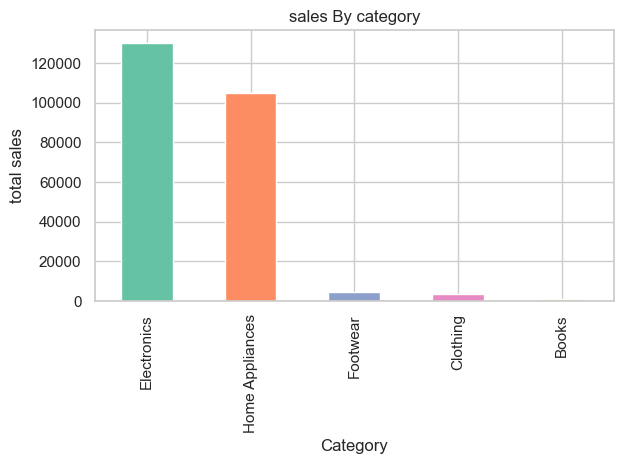

In [37]:
num_bars = len(sales_by_category)
colors = sns.color_palette("Set2", num_bars)
sales_by_category.plot(kind='bar',
                       title="sales By category",
                       ylabel="total sales",
                      color=colors)
plt.tight_layout()
plt.show()

In [39]:
sales_by_Product=df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

In [41]:
print(" المبيعات حسب المنتج:")
print(sales_by_Product)

 المبيعات حسب المنتج:
Product
Refrigerator       78000
Laptop             58400
Smartphone         48500
Washing Machine    27000
Smartwatch         15750
Headphones          7300
Running Shoes       4320
Jeans               2480
T-Shirt             1060
Book                1035
Name: Total Sales, dtype: int64


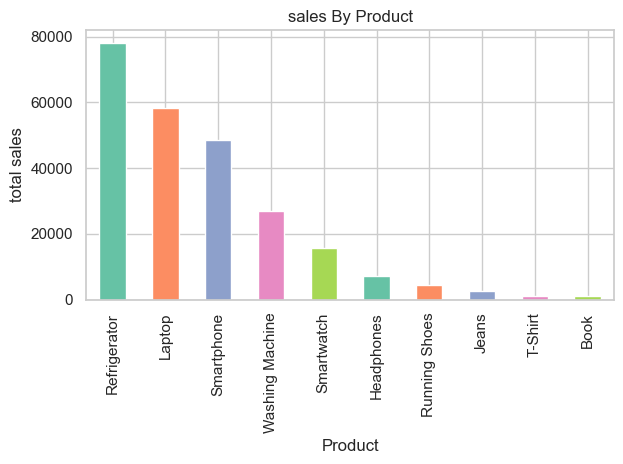

In [43]:
num_bars = len(sales_by_category)
colors = sns.color_palette("Set2", num_bars)
sales_by_Product.plot(kind='bar',
                       title="sales By Product",
                       ylabel="total sales",
                      color=colors)
plt.tight_layout()
plt.show()

In [45]:
order_status=df['Status'].value_counts()
print('تحليل الطلبات حسب الحالة'),order_status


تحليل الطلبات حسب الحالة


(None,
 Status
 Completed    88
 Pending      85
 Cancelled    77
 Name: count, dtype: int64)

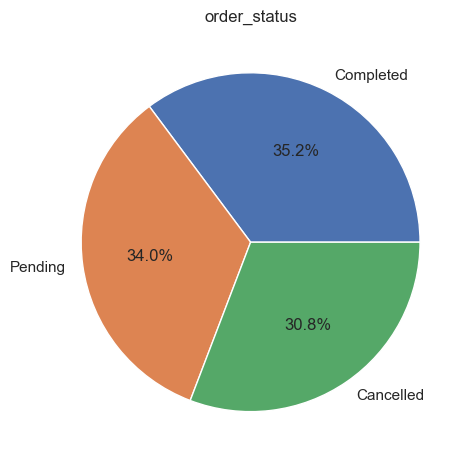

In [47]:
order_status.plot(kind='pie', autopct='%1.1f%%', title="order_status")
plt.ylabel('')
plt.tight_layout()
plt.show()

In [49]:
Payment_Method=df['Payment Method'].value_counts()
print('payment method :',Payment_Method)

payment method : Payment Method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64


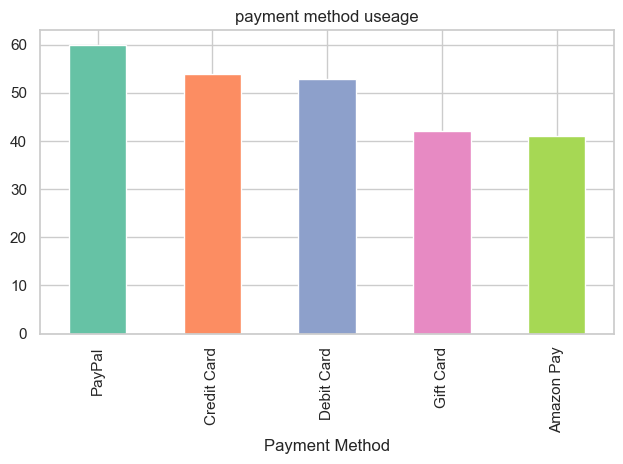

In [51]:
num_bars = len(Payment_Method)
colors = sns.color_palette("Set2", num_bars)
Payment_Method.plot(kind='bar', title='payment method useage', color=colors)
plt.tight_layout()
plt.show()

In [53]:
monthly_sales=df.groupby('month')['Total Sales'].sum()
print('Monthiy Sales :',monthly_sales)

Monthiy Sales : month
2025-02    122695
2025-03    117730
2025-04      3420
Freq: M, Name: Total Sales, dtype: int64


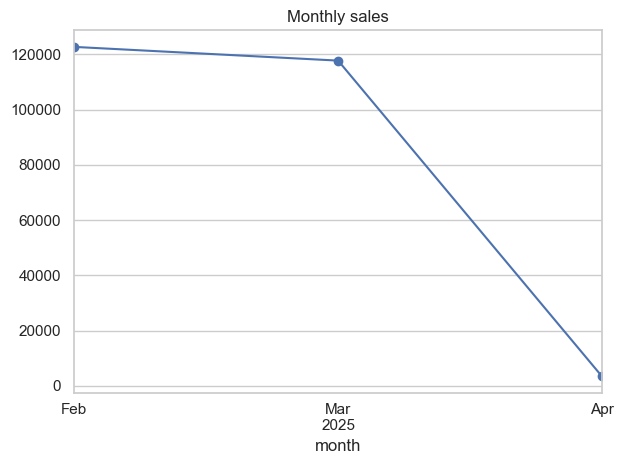

In [55]:
monthly_sales.plot(kind='line' ,title='Monthly sales' ,marker='o')
plt.ylabel=('Totel Sales')
plt.tight_layout()

plt.show()

In [57]:
orders_by_location = df['Customer Location'].value_counts()
print("📌orders_by_location:\n", orders_by_location)

📌orders_by_location:
 Customer Location
Houston          32
Miami            31
Dallas           29
New York         26
Denver           26
Boston           26
Seattle          22
Chicago          22
San Francisco    19
Los Angeles      17
Name: count, dtype: int64


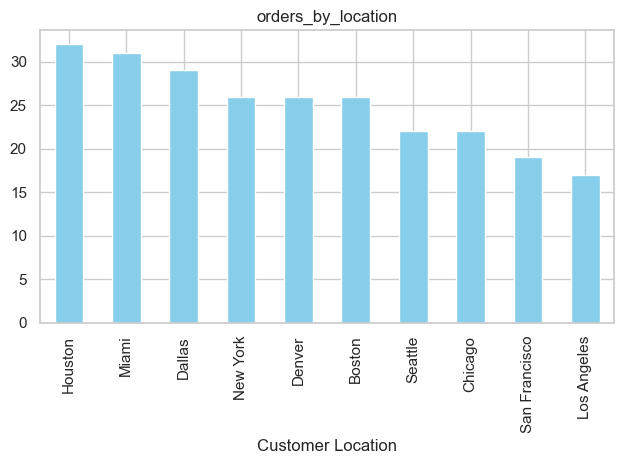

In [59]:

orders_by_location.plot(kind='bar', title="orders_by_location", color='skyblue')
plt.ylabel=('orders')
plt.tight_layout()
plt.show()

In [61]:
sales_by_location = df.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False)
print("💰sales_by_location:\n", sales_by_location)

💰sales_by_location:
 Customer Location
Miami            31700
Denver           29785
Houston          28390
Dallas           27145
Seattle          26890
Boston           26170
Chicago          20810
New York         18940
Los Angeles      17820
San Francisco    16195
Name: Total Sales, dtype: int64


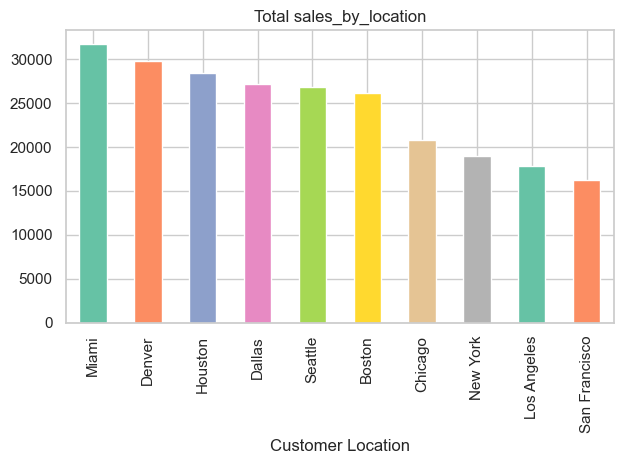

In [91]:
num_bar = len(sales_by_location)
colors = sns.color_palette("Set2", num_bar)
sales_by_location.plot(kind='bar', title='Total sales_by_location', color=colors)
plt.tight_layout()
plt.show()

In [65]:
orders_by_customer = df['Customer Name'].value_counts()
print("📦orders_by_customer:\n", orders_by_customer)

📦orders_by_customer:
 Customer Name
Emma Clark       32
Jane Smith       30
Olivia Wilson    29
John Doe         26
David Lee        26
Michael Brown    24
Daniel Harris    23
Emily Johnson    22
Chris White      22
Sophia Miller    16
Name: count, dtype: int64


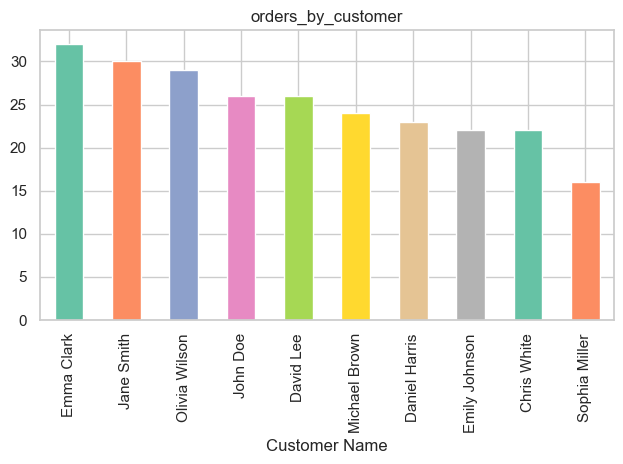

In [67]:

num_bar = len(orders_by_customer)
colors = sns.color_palette("Set2", num_bar)
orders_by_customer.plot(kind='bar', title='orders_by_customer', color=colors)
plt.tight_layout()
plt.show()

In [71]:
sales_by_customer = df.groupby('Customer Name')['Total Sales'].sum().sort_values(ascending=False)
print("💰 sales_by_customer:\n", sales_by_customer.head(10))

💰 sales_by_customer:
 Customer Name
Olivia Wilson    36170
Jane Smith       31185
Emma Clark       29700
John Doe         26870
Emily Johnson    23475
David Lee        22665
Michael Brown    22655
Daniel Harris    18945
Chris White      18885
Sophia Miller    13295
Name: Total Sales, dtype: int64


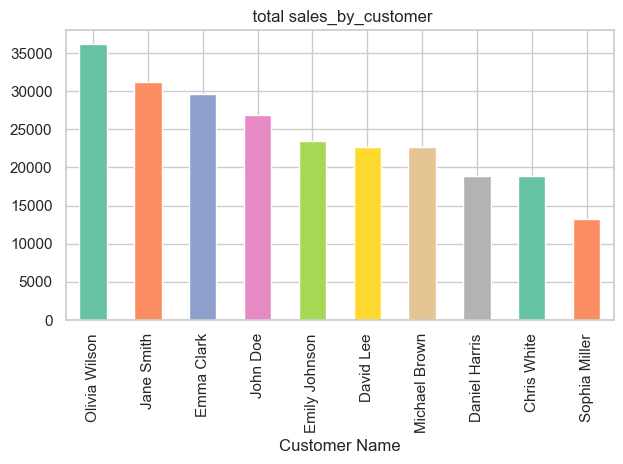

In [75]:

num_bar = len(sales_by_customer)
colors = sns.color_palette("Set2", num_bar)
sales_by_customer.plot(kind='bar', title=' total sales_by_customer', color=colors)
plt.tight_layout()
plt.show()

In [97]:
df.to_csv("analysis_result_amazon 2025.csv", index=False)